# CMSC 197 Problem Set 2

Adrian Miguel Custodio

In [30]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### For Preprocessing #####
import email  
import re 
from collections import Counter  
from sklearn.metrics import accuracy_score, precision_score, recall_score


## Preprocessing of Data

Split the dataset into three(3) groups: training set for ham, training set for spam, and the testing
set. 

Remove words from the document which may not contribute to the information we want to
extract. These includes dropping the alphanumeric characters and punctuation marks.

Also, remove stop words, more popularly known as meaningless words, from the email body
since those words are not useful in classification as well as reduce the dimensionality of the
dictionary

In [2]:
#setting up the dataset
df_labels = pd.read_csv("labels", sep=" ")
df_labels.columns = ["label", "filepath"]

#change ham labels into 0; spam labels into 1
for i, row in df_labels.iterrows():
    if df_labels['label'][i] == "ham":     
        df_labels.at[i,'filepath'] =  (df_labels.at[i,'filepath']).replace("../", "")
        df_labels.at[i,'label'] = 0
    else:
        df_labels.at[i,'filepath'] =  (df_labels.at[i,'filepath']).replace("../", "")
        df_labels.at[i,'label'] = 1
        
df_labels

,label,filepath
0,0,data/000/000
1,1,data/000/001
2,1,data/000/002
3,0,data/000/003
4,1,data/000/004
...,...,...
37817,1,data/126/017
37818,1,data/126/018
37819,1,data/126/019
37820,1,data/126/020


In [31]:
#open stop_words file
with open("stop_words.txt","r") as file:
    stop_words = file.read().splitlines()


In [46]:
#function the cleans the message and rids it of other special characters
def message_cleanse(message):
    words = ""   
    
    for word in message.split():
        #calls function that stores the things to remove
        msg = word_cleanup(word)
        
        #if message is not found in the stop_words file nor is it empty
        if msg not in stop_words and msg != "" : 
            words += (msg+" ")
            
    return words         



In [47]:
#function that stores the characters to be removed from the messages
def word_cleanup(msg):
    num = "0123456789"
    html_tags = "<[^<>]+>"
    
    msg = msg.lower()
    msg = re.sub(html_tags,'', msg)
    msg = re.sub(num,'', msg)
    msg = re.sub('[^a-z]','', msg)
    
    return msg
    

In [48]:
#function for checking mulitparts of emails
def multipart_checker(message):
        msg = ""
        
        #if message is multipart   
        if message.is_multipart():
            # loops through diff parts of the email
            for email_part in message.walk():
                # checks content whather if text/plain
                if email_part.get_content_type() == "text/plain":
                    # gets the text/plain part
                    msg = email_part.get_payload()  
                    break
        #not multipart
        else:
            msg = message.get_payload()
        
        return msg

In [61]:
#dictionary for the email message and its path
message_dict = {'filepath':[], 'Message':[]}
encode_def = "ISO-8859-1" # default encoding

#for every path in the dataset
for path in df_labels['filepath']:
    message_dict['filepath'].append(path)
    
    # open file for the email content 
    with open(f"{path}", "r", encoding = encode_def) as e_mail:
        
        message = email.message_from_file(e_mail) 
        
        #multipart checker
        msg = multipart_checker(message)
        #message unusdable characters cleaner
        msg_update = message_cleanse(msg)
        
        # append the cleaned message to the content_dict under content 
        message_dict['Message'].append(msg_update)

In [66]:
#convert the dictionary into a dataframe and display it with the df_labels data
df_content = pd.DataFrame.from_dict(message_dict)
df_main= pd.merge(df_labels, df_content, on='filepath')
df_main

,label,filepath,Message
0,0,data/000/000,mailing list queried weeks ago running set arc...
1,1,data/000/001,luxury watches buy rolex rolex cartier bvlgari...
2,1,data/000/002,academic qualifications prestigious nonacc red...
3,0,data/000/003,greetings verify subscription planfans list ch...
4,1,data/000/004,chauncey conferred luscious continued tonsilli...
...,...,...,...
37817,1,data/126/017,great news expec ted infinex ventures infx pri...
37818,1,data/126/018,oil sector going crazy weekly gift kkpt thing ...
37819,1,data/126/019,httpvdtobjdocscaninfo suffering pain depressio...
37820,1,data/126/020,prosperous future increased money earning powe...


In [67]:
#removes the "data/" part of path to use the files numerically
for i, row in df_main.iterrows():
    df_main.at[i,'filepath'] =  (df_main.at[i,'filepath']).replace("data/", "")

#training data set
df_train = df_main[df_main['filepath']<= '071']
df_train

,label,filepath,Message
0,0,000/000,mailing list queried weeks ago running set arc...
1,1,000/001,luxury watches buy rolex rolex cartier bvlgari...
2,1,000/002,academic qualifications prestigious nonacc red...
3,0,000/003,greetings verify subscription planfans list ch...
4,1,000/004,chauncey conferred luscious continued tonsilli...
...,...,...,...
21295,1,070/295,btijclnab binpqnejgmb httpgethighbizez bldb xi...
21296,1,070/296,special offer adobe video collection adobe pre...
21297,1,070/297,doctype html public wcdtd html transitionalen ...
21298,0,070/298,mounted isu infrared demodulator hb realised r...


In [68]:
#training data set of ham
ham_train_set = df_train[df_train['label'] == 0]
ham_train_set.reset_index()

,index,label,filepath,Message
0,0,0,000/000,mailing list queried weeks ago running set arc...
1,3,0,000/003,greetings verify subscription planfans list ch...
2,5,0,000/005,quiet quiet well straw poll plan running
3,6,0,000/006,working departed totally bell labs recommended...
4,10,0,000/010,greetings mass acknowledgement signed planfans...
...,...,...,...,...
7518,21270,0,070/270,equation generate prime numbers equation theor...
7519,21271,0,070/271,equation generate prime numbers equation theor...
7520,21288,0,070/288,dear dmdx users guidance generating dmdx item ...
7521,21293,0,070/293,built handyboard works great testmotor passes ...


In [69]:
#training dataset of spam
spam_train_set = df_train[df_train['label'] == 1]
spam_train_set.reset_index()

,index,label,filepath,Message
0,1,1,000/001,luxury watches buy rolex rolex cartier bvlgari...
1,2,1,000/002,academic qualifications prestigious nonacc red...
2,4,1,000/004,chauncey conferred luscious continued tonsilli...
3,7,1,000/007,nbc today body diet beaches magazines hollywoo...
4,8,1,000/008,oil sector going crazy weekly gift kkpt thing ...
...,...,...,...,...
13772,21294,1,070/294,txtadd
13773,21295,1,070/295,btijclnab binpqnejgmb httpgethighbizez bldb xi...
13774,21296,1,070/296,special offer adobe video collection adobe pre...
13775,21297,1,070/297,doctype html public wcdtd html transitionalen ...


In [70]:
#testing dataset
df_test = df_main[df_main['filepath'] > '071']
df_test.reset_index()

,index,label,filepath,Message
0,21300,1,071/000,hesitantly derive perverse satisfaction clodho...
1,21301,0,071/001,things perform experiment display will remain ...
2,21302,1,071/002,best offer month viggra ci ialis vaiium xa naa...
3,21303,1,071/003,de ar wne cr doesnt matter ow real st mmed ia ...
4,21304,1,071/004,special offer adobe video collection adobe pre...
...,...,...,...,...
16517,37817,1,126/017,great news expec ted infinex ventures infx pri...
16518,37818,1,126/018,oil sector going crazy weekly gift kkpt thing ...
16519,37819,1,126/019,httpvdtobjdocscaninfo suffering pain depressio...
16520,37820,1,126/020,prosperous future increased money earning powe...


In [156]:
#top 
dict_top_10k = {}

for i, r in df_train.iterrows():
    for word in str(r['Message']).split():
        if word in dict_top_10k:
            dict_top_10k[word] += 1
        else:
            dict_top_10k[word] = 1

#sort the dictionary to be from most frequent to least
dict_sort = sorted(dict_top_10k.items(), key=lambda x: x[1], reverse=True)
top_10k_words = dict(dict_sort[:10000])


# Creating the Feature Matrices

Create feature matrices for both the spam training set and ham training set with a dimensionality of 10000

In [111]:
#setting the dictionary into a list for index purposes
top_10k_words_list = list(top_10k_words.keys())

#matrix of zeros all 10k words for the ham train set
ham_feat_matrix= np.zeros((len(ham_train_set), 10000))

#for loop to iterate through the ham training set to update the matrix
for i in range(len(ham_train_set)):
    for word in str(ham_train_set.iloc[i]['Message']).split():
        #checks if the word encountered is in the 10k words
        if word in top_10k_words:
            ham_feat_matrix[i][top_10k_words_list.index(word)] = 1
ham_feat_matrix

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
#data frame version of the matrix
ham_df = pd.DataFrame(ham_feat_matrix, columns = top_10k_words)
ham_df

,bb,td,will,width,board,size,price,company,gold,email,...,morphological,nope,reminded,prompts,guessed,ruby,wavelength,cg,recomb,sao
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7520,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7521,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
#matrix of zeros for all 10k words for the ham train set
spam_feat_matrix = np.zeros((len(spam_train_set), 10000))

#for loop to iterate through the spam training set to update the matrix
for i in range(len(spam_train_set)):
    for word in str(spam_train_set.iloc[i]['Message']).split():
        #checks if the word encountered is in the 10k words
        if word in top_10k_words:
            spam_feat_matrix[i][top_10k_words_list.index(word)] = 1

spam_feat_matrix


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [114]:
#data frame version of the matrix
spam_df = pd.DataFrame(spam_feat_matrix, columns = top_10k_words)
spam_df


,bb,td,will,width,board,size,price,company,gold,email,...,morphological,nope,reminded,prompts,guessed,ruby,wavelength,cg,recomb,sao
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13774,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13775,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Computing the Priors

Prior probabilities of Ham and Spam

In [115]:
# P (c=ham) = number of ham emails in train set/overall email train set size
prob_ham = ham_train_set.count(axis=0)[0] / df_train.shape[0]  
prob_ham

0.3531924882629108

In [116]:
# P (c=ham) = number of ham emails in train set/overall email train set size
prob_spam = spam_train_set.count(axis=0)[0] / df_train.shape[0]  
prob_spam

0.6468075117370892

# Computing the Likelihood of each word (+ Laplace Smoothing)

In [189]:
#function for laplace smoothing
# equation of probability: (word count + alpha) / (total words + alpha * number of words in vocabulary) 
def laplace_smoothing(feature_matrix,top_10k_words, alpha):
        #sets an array of zeros
        p_count = np.zeros(len(top_10k_words))
        #calculates word count
        word_count = np.sum(feature_matrix, axis= 0)
        #counts the amount of words in the data sets
        total_words = np.sum (word_count)
        
        
        
        #length of the top 10k words dataset
        top_word_len = len(top_10k_words)
        
        #using the equation, calculates the probability of words whether it be ham or spam
        for i in range (top_word_len):
            curr_data = (word_count[i] + alpha) / (total_words + alpha*top_word_len)
            p_count[i] = curr_data
        return p_count
    
alpha = 1
    
ham_word_p = laplace_smoothing(ham_feat_matrix, top_10k_words, alpha)
spam_word_p = laplace_smoothing(spam_feat_matrix, top_10k_words, alpha)


# Classify Emails

In [118]:
#function for classifying emails
def email_checker (email, prob_ham, prob_spam, ham_word_p, spam_word_p, words_list):
    #initialize variables
    ham_log = 0
    spam_log = 0
    
    #add the initial log probabilities of ham and spam
    ham_log = ham_log + np.log(prob_ham)
    spam_log = spam_log + np.log(prob_spam)
    
    
    #email message split into strings to be tokenized
    sentence = str(email).split()
    
    #for every word in the message
    for word in sentence:
        #if word is in the top 10k words, the probabilities for both ham and spam gets higher
        if word in top_10k_words:
            ham_log =  ham_log + np.log(ham_word_p[words_list.index(word)])
            spam_log = spam_log + np.log(spam_word_p[words_list.index(word)])
    
    #return 0 if email is more likely to be ham, else return 1 for spam
    if ham_log > spam_log:
        return 0
    else:
        return 1

# Testing the Classifier

In [119]:
# using the test dataset to, uh, test the email checker/classifier
df_test['predicted'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p, spam_word_p , top_10k_words_list))
df_test

C:\Users\airco\AppData\Local\Temp\ipykernel_5764\763495712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p, spam_word_p , top_10k_words_list))


,label,filepath,Message,predicted
21300,1,071/000,hesitantly derive perverse satisfaction clodho...,1
21301,0,071/001,things perform experiment display will remain ...,0
21302,1,071/002,best offer month viggra ci ialis vaiium xa naa...,1
21303,1,071/003,de ar wne cr doesnt matter ow real st mmed ia ...,1
21304,1,071/004,special offer adobe video collection adobe pre...,1
...,...,...,...,...
37817,1,126/017,great news expec ted infinex ventures infx pri...,1
37818,1,126/018,oil sector going crazy weekly gift kkpt thing ...,1
37819,1,126/019,httpvdtobjdocscaninfo suffering pain depressio...,1
37820,1,126/020,prosperous future increased money earning powe...,1


# Performance Evaluation

In [120]:
#turn the categories into array to ensure they are of the same type and display results
actual = np.array(df_test['label']).tolist()
prediction = np.array(df_test['predicted']).tolist()

comparisons_df = pd.DataFrame({"Filepath":df_test['filepath'],"Act Val": actual, "Pred Val": prediction})
comparisons_df


,Filepath,Act Val,Pred Val
21300,071/000,1,1
21301,071/001,0,0
21302,071/002,1,1
21303,071/003,1,1
21304,071/004,1,1
...,...,...,...
37817,126/017,1,1
37818,126/018,1,1
37819,126/019,1,1
37820,126/020,1,1


In [121]:
#utilizing sklearns' accuracy, recall, and precision functions to check their scores
print(f"Accuracy Score= {accuracy_score(actual,prediction)}")
print(f"Recall Score = {recall_score(actual,prediction)}")
print(f"Precision Score = {precision_score(actual,prediction)}")

Accuracy Score= 0.9318484444982448
Recall Score = 0.9223170184104176
Precision Score = 0.9752160288671541


# GUIDE QUESITIONS

## Q.1

What is the effect of removing stop words in terms of precision, recall, and accuracy?
Show a plot or a table of these results.

I have used the same process earlier in a different notebook titled [hw4]no stop_words.ipynb and these are the results

Scores with Stop Words:\
Accuracy Score= 0.9318484444982448\
Recall Score = 0.9223170184104176\
Precision Score = 0.9752160288671541

Scores without Stop Words (done in a separate notebook):\
Accuracy Score= 0.9092119598111609\
Recall Score = 0.8896273013022002\
Precision Score = 0.9733713275031934

Text(0.5, 1.0, 'Comparison between two processes (with or w/o stop words')

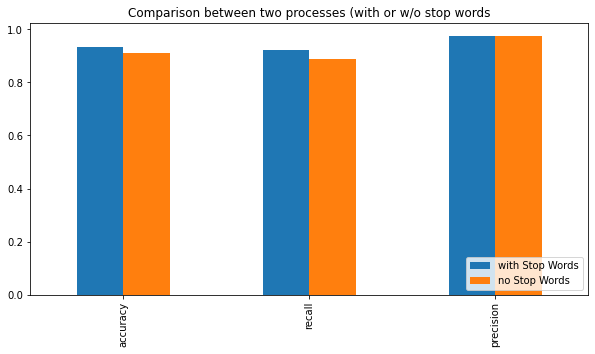

In [158]:

plotdata = pd.DataFrame({
    "with Stop Words":[ 0.9318484444982448,  0.9223170184104176,  0.9752160288671541],
    "no Stop Words":[0.9092119598111609, 0.8896273013022002, 0.9733713275031934],

    }, 
    index=['accuracy', 'recall', 'precision']
)


plotdata.plot(kind="bar", figsize=(10, 5))
plt.legend(loc='lower right')
plt.title("Comparison between two processes (with or w/o stop words")


As seen in the figure, the process with stop words wins when compared in all categories

## Q.2

Experiment on the number of words used for training. Filter the dictionary to include only
words occurring more than k times (1000 words, then k > 100, and k = 50 times). 

In the other notebooks ([hw4]k_50.ipynb and [hw4]k_100.ipynb), the values were changed when looking for the top 10k words. Here are the results:

#### k = 50 
Accuracy Score= 0.931122140176734\
Recall Score = 0.9238437359676696\
Precision Score = 0.9725820175853267

#### k = 100 
Accuracy Score= 0.9306379372957269\
Recall Score = 0.9259991019308487\
Precision Score = 0.9697169190256748


Text(0.5, 1.0, 'Comparison between two processes (with or w/o stop words')

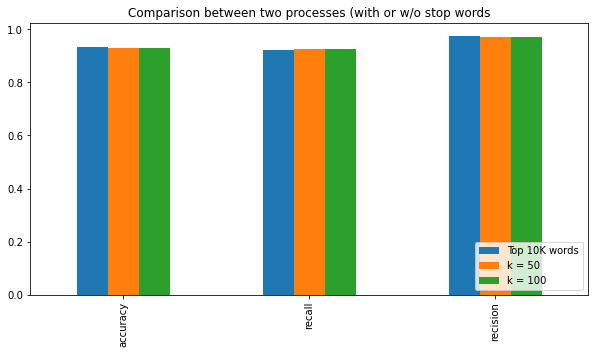

In [159]:

plotdata = pd.DataFrame({
    "Top 10K words":[ 0.9318484444982448,  0.9223170184104176,  0.9752160288671541],
    "k = 50":[ 0.931122140176734, 0.9238437359676696, 0.9725820175853267],
    "k = 100": [ 0.9306379372957269,  0.9259991019308487, 0.9697169190256748]

    }, 
    index=['accuracy', 'recall', 'recision']
)


plotdata.plot(kind="bar", figsize=(10, 5))
plt.legend(loc='lower right')
plt.title("Comparison between two processes (with or w/o stop words")

The figure shows that though the statistics are very close to each of the instances, the normal data wins in accuracy, k=100 wins in recall, and k=50 wins in precision

## Q.3

Discuss the results of the different parameters used for Lambda smoothing. Test it on 5
varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics
for each.

##  λ = 0.005

In [190]:
alpha = 0.005
    
ham_word_p_005 = laplace_smoothing(ham_feat_matrix, top_10k_words, alpha)
spam_word_p_005 = laplace_smoothing(spam_feat_matrix, top_10k_words, alpha)


In [171]:
df_test['predicted_005'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_005, spam_word_p_005 , top_10k_words_list))
actual_005 = np.array(df_test['label']).tolist()
prediction_005 = np.array(df_test['predicted_005']).tolist()

print(f"Accuracy Score= {accuracy_score(actual_005,prediction_005)}")
print(f"Recall Score = {recall_score(actual_005,prediction_005)}")
print(f"Precision Score = {precision_score(actual_005,prediction_005)}")

Accuracy Score= 0.9335431545817697
Recall Score = 0.9233947013920072
Precision Score = 0.9767265127766696


C:\Users\airco\AppData\Local\Temp\ipykernel_5764\2052436288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_005'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_005, spam_word_p_005 , top_10k_words_list))


##  λ = 0.1

In [191]:
alpha = 0.1
    
ham_word_p_01 = laplace_smoothing(ham_feat_matrix, top_10k_words, alpha)
spam_word_p_01 = laplace_smoothing(spam_feat_matrix, top_10k_words, alpha)


In [175]:
df_test['predicted_01'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_01, spam_word_p_01 , top_10k_words_list))
actual_01 = np.array(df_test['label']).tolist()
prediction_01 = np.array(df_test['predicted_01']).tolist()

print(f"Accuracy Score= {accuracy_score(actual_01,prediction_01)}")
print(f"Recall Score = {recall_score(actual_01,prediction_01)}")
print(f"Precision Score = {precision_score(actual_01,prediction_01)}")

Accuracy Score= 0.9335431545817697
Recall Score = 0.9242029636281994
Precision Score = 0.9759127548601233


C:\Users\airco\AppData\Local\Temp\ipykernel_5764\4289330024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_01'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_01, spam_word_p_01 , top_10k_words_list))


##  λ = 0.5

In [192]:
alpha = 0.5
    
ham_word_p_05 = laplace_smoothing(ham_feat_matrix, top_10k_words, alpha)
spam_word_p_05 = laplace_smoothing(spam_feat_matrix, top_10k_words, alpha)


In [176]:
df_test['predicted_05'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_05, spam_word_p_05 , top_10k_words_list))
actual_05 = np.array(df_test['label']).tolist()
prediction_05 = np.array(df_test['predicted_05']).tolist()

print(f"Accuracy Score= {accuracy_score(actual_05,prediction_05)}")
print(f"Recall Score = {recall_score(actual_05,prediction_05)}")
print(f"Precision Score = {precision_score(actual_05,prediction_05)}")

Accuracy Score= 0.9329379009805109
Recall Score = 0.9236641221374046
Precision Score = 0.9755287868728066


C:\Users\airco\AppData\Local\Temp\ipykernel_5764\2999352206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_05'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_05, spam_word_p_05 , top_10k_words_list))


##  λ = 2

In [193]:
alpha = 2
    
ham_word_p_2 = laplace_smoothing(ham_feat_matrix, top_10k_words, alpha)
spam_word_p_2 = laplace_smoothing(spam_feat_matrix, top_10k_words, alpha)


In [177]:
df_test['predicted_2'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_2, spam_word_p_2 , top_10k_words_list))
actual_2 = np.array(df_test['label']).tolist()
prediction_2 = np.array(df_test['predicted_2']).tolist()

print(f"Accuracy Score= {accuracy_score(actual_2,prediction_2)}")
print(f"Recall Score = {recall_score(actual_2,prediction_2)}")
print(f"Precision Score = {precision_score(actual_2,prediction_2)}")

Accuracy Score= 0.931122140176734
Recall Score = 0.9216883700044903
Precision Score = 0.9747364422072372


C:\Users\airco\AppData\Local\Temp\ipykernel_5764\1179761521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_2'] = df_test['Message'].apply(lambda msg: email_checker(msg, prob_ham, prob_spam, ham_word_p_2, spam_word_p_2 , top_10k_words_list))


Text(0.5, 1.0, 'Accuracy Scores between Lambda values')

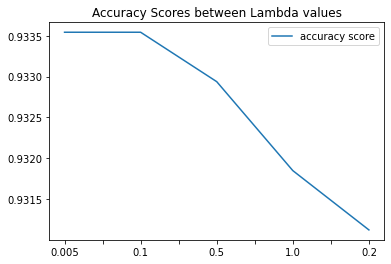

In [186]:
df = pd.DataFrame({
   'accuracy score': [0.9335431545817697, 0.9335431545817697, 0.9329379009805109, 0.9318484444982448, 0.931122140176734],

   }, index=["0.005", "0.1", "0.5", "1.0", "0.2"])
lines = df.plot.line()
plt.title("Accuracy Scores between Lambda values")

Text(0.5, 1.0, 'Recall Scores between Lambda values')

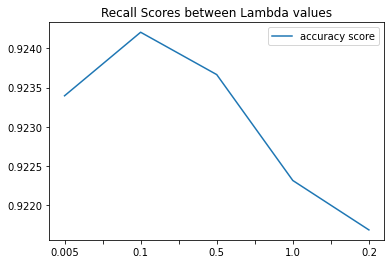

In [187]:
df = pd.DataFrame({
   'accuracy score': [0.9233947013920072, 0.9242029636281994, 0.9236641221374046, 0.9223170184104176, 0.9216883700044903],

   }, index=["0.005", "0.1", "0.5", "1.0", "0.2"])
lines = df.plot.line()
plt.title("Recall Scores between Lambda values")

Text(0.5, 1.0, 'Precision Scores between Lambda values')

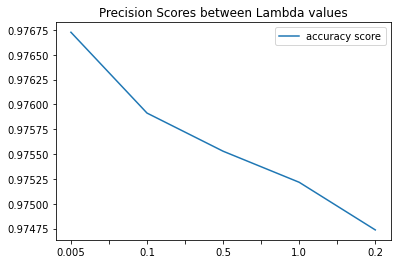

In [188]:
df = pd.DataFrame({
   'accuracy score': [ 0.9767265127766696, 0.9759127548601233, 0.9755287868728066, 0.9752160288671541, 0.9747364422072372],

   }, index=["0.005", "0.1", "0.5", "1.0", "0.2"])
lines = df.plot.line()
plt.title("Precision Scores between Lambda values")

As shown in the line graphs, the lower the lambda/alpha values, the higher the scores. This can mostly apply to everything except for when the lambda value = 0.005 is used where it either plateus or decreases.

## Q.4

The different tests given to the model yeild very close results, down to the slightest of decimals. This leads me to believe that there is not much to improve when choosing values such us lambda nor the amount of times a word has occured more than a hundred. The big concern I had this problem set was the time it took with some processes. Maybe the creation of the feature matrix took most of the runtime and another process would've sped it up.